## Load Libraries

In [21]:
suppressPackageStartupMessages({ 
    library(data.table) 
    library(dplyr) 
    library(ggplot2) 
    library(SingleCellExperiment)
    library(dplyr)
    library(celldex)
    library(SingleR)
    library(RColorBrewer)
    library(scater) 
    library(StabMap) 
    library(scran) 
    library(harmony) 
    library(patchwork)
    library(Seurat)
    library(plotly)
    library(pheatmap)
    library(batchelor)
})

## Celltype Colours

In [22]:
stages_colors = c(
"E6.5" = "#F21A00",
"E6.75" = "#EC4B00",
"E7.0" = "#E67D00",
"E7.25" = "#E1AF00",
"E7.5" = "#E4B80E",
"E7.75"="#E7C21C",
"E8.0" = "#EBCC2A",
"E8.25" = "#C4C55D",
"E8.5" = "#9EBE91",
"E8.75" = "#78B7C5",
"E9.0" = "#3399FF",
"E9.25"="#297ACC",
"E9.5"="#2162A3",
"Mixed gastrulation" = "#BEBEBE")

In [23]:
anatomy_colors = c(
"EP" = "#000000",
"YS" = "#5E4FA2",
"Anterior section" = "#774611",
"Posterior section" = "#A2D630",
"Medial section" = "#D95F02",
"Posterior"="#E2C207",
"Anterior" = "#F71616",
"Pooled" = "#BEBEBE",
"NA" = "#BEBEBE")

In [24]:
original.colors = c(
  "Epiblast" = "#635547",
  "Primitive Streak" = "#DABE99",
  "Anterior Primitive Streak" = "#c19f70",
  "Caudal epiblast" = "#9e6762",
  "PGC" = "#FACB12",
  "Anterior Primitive_Streak" = "#c19f70",
  "Notochord" = "#0F4A9C",
  "Def. endoderm" = "#F397C0",
  "Gut" = "#EF5A9D",
  "Nascent mesoderm" = "#C594BF",
  "Mixed mesoderm" = "#DFCDE4",
  "Intermediate mesoderm" = "#139992",
  "Caudal Mesoderm" = "#3F84AA",
  "Paraxial mesoderm" = "#8DB5CE",
  "Somitic mesoderm" = "#005579",
  "Pharyngeal mesoderm" = "#C9EBFB",
  "Cardiomyocytes" = "#B51D8D",
  "Allantois" = "#532C8A",
  "ExE mesoderm" = "#8870ad",
  "Mesenchyme" = "#cc7818",
  "Haematoendothelial progenitors" = "#FBBE92",
  "Endothelium" = "#ff891c",
  "Blood progenitors" = "#c9a997",
  "Blood progenitors 1" = "#f9decf",
  "Blood progenitors 2" = "#c9a997",
  "Erythroid" = "#EF4E22",
  "Erythroid1" = "#C72228",
  "Erythroid2" = "#f79083",
  "Erythroid3" = "#EF4E22",
  "NMP" = "#8EC792",
  "Neurectoderm" = "#65A83E",
  "Rostral neurectoderm" = "#65A83E",
  "Caudal neurectoderm" = "#354E23",
  "Neural crest" = "#C3C388",
  "Forebrain Midbrain_Hindbrain" = "#647a4f",
  "Spinal cord" = "#CDE088",
  "Surface ectoderm" = "#f7f79e",
  "Visceral endoderm" = "#F6BFCB",
  "ExE endoderm" = "#7F6874",
  "ExE ectoderm" = "#989898",
  "Parietal endoderm" = "#1A1A1A"
)

In [25]:
extended.colors = c(
"Epiblast" = "#635547",
"Epiblast_0" = "#635547",
"Epiblast_1" = "#FACB12",
"Primitive Streak" = "#DABE99",
"Caudal epiblast" = "#9e6762",
"PGC" = "#FACB12",
"Anterior Primitive Streak" = "#c19f70",
"Node"="#153b3d",
"Notochord" = "#0F4A9C",
"Gut tube" = "#EF5A9D",
"Hindgut" = "#F397C0",
"Midgut" = "#ff00b2",
"Foregut" = "#ffb7ff",
"Pharyngeal endoderm"="#95e1ff",
"Thyroid primordium"="#97bad3",
"Nascent mesoderm" = "#C594BF",
"Intermediate mesoderm" = "#139992",
"Caudal mesoderm" = "#3F84AA",
"Lateral plate mesoderm" = "#F9DFE6",
"Limb mesoderm" = "#e35f82",
"Forelimb" = "#d02d75",
"Kidney primordium" = "#e85639",
"Presomitic mesoderm"="#5581ca",#"#0000ff",#blue
"Somitic mesoderm" = "#005579",
"Posterior somitic tissues" = "#5adbe4",#"#40e0d0",#turquoise
"Paraxial mesoderm" = "#8DB5CE",
"Cranial mesoderm" = "#456722",#"#006400",#darkgreen
"Anterior somitic tissues"= "#d5e839",
"Sclerotome" = "#e3cb3a",#"#ffff00",#yellow
"Dermomyotome" = "#00BFC4",#"#a52a2a",#brown
"Pharyngeal mesoderm" = "#C9EBFB",
"Cardiopharyngeal progenitors" = "#556789",
"Anterior cardiopharyngeal progenitors"="#683ed8",
"Allantois" = "#532C8A",
"Mesenchyme" = "#cc7818",
"YS mesothelium" = "#ff7f9c",
"Epicardium"="#f79083",
"Embryo proper mesothelium" = "#ff487d",
"Cardiopharyngeal progenitors FHF"="#d780b0",
"Cardiomyocytes FHF 1"="#a64d7e",
"Cardiomyocytes FHF 2"="#B51D8D",
"Cardiopharyngeal progenitors SHF"="#4b7193",
"Cardiomyocytes SHF 1"="#5d70dc",
"Cardiomyocytes SHF 2"="#332c6c",
"Haematoendothelial progenitors" = "#FBBE92",
"Blood progenitors" = "#6c4b4c",
"Erythroid" = "#C72228",
"Chorioallantoic-derived erythroid progenitors"="#E50000",
"Megakaryocyte progenitors"="#e3cb3a",
"MEP"="#EF4E22",
"EMP"="#7c2a47",
"YS endothelium"="#ff891c",
"YS mesothelium-derived endothelial progenitors"="#AE3F3F",
"Allantois endothelium"="#2f4a60",
"Embryo proper endothelium"="#90e3bf",
"Venous endothelium"="#bd3400",
"Endocardium"="#9d0049",
"NMPs/Mesoderm-biased" = "#89c1f5",
"NMPs" = "#8EC792",
"Ectoderm" = "#ff675c",
"Optic vesicle" = "#bd7300",
"Ventral forebrain progenitors"="#a0b689",
"Early dorsal forebrain progenitors"="#0f8073",
"Late dorsal forebrain progenitors"="#7a9941",
"Midbrain/Hindbrain boundary"="#8ab3b5",
"Midbrain progenitors"="#9bf981",
"Dorsal midbrain neurons"="#12ed4c",
"Ventral hindbrain progenitors"="#7e907a",
"Dorsal hindbrain progenitors"="#2c6521",
"Hindbrain floor plate"="#bf9da8",
"Hindbrain neural progenitors"="#59b545",
"Neural tube"="#233629",
"Migratory neural crest"="#4a6798",
"Branchial arch neural crest"="#bd84b0",
"Frontonasal mesenchyme"="#d3b1b1",
"Spinal cord progenitors"="#6b2035",
"Dorsal spinal cord progenitors"="#e273d6",
"Non-neural ectoderm" = "#f7f79e",
"Surface ectoderm" = "#fcff00",
"Epidermis" = "#fff335",
"Limb ectoderm" = "#ffd731",
"Amniotic ectoderm" = "#dbb400",
"Placodal ectoderm" = "#ff5c00",
"Otic placode"="#f1a262",
"Otic neural progenitors"="#00b000",
"Visceral endoderm" = "#F6BFCB",
"ExE endoderm" = "#7F6874",
"ExE ectoderm" = "#989898",
"Parietal endoderm" = "#1A1A1A"
)

## Shila's Code for StabMap

In [26]:
vectorSubset = function(vec, mat){
  # vec is a named vector
  # mat is a matrix containing the names or indices for which you want
  # to get the entries of vec
  
  vmat = c(mat)
  vvec = vec[vmat]
  
  vecmat = matrix(vvec, nrow = nrow(mat), ncol = ncol(mat))
  colnames(vecmat) <- colnames(mat)
  rownames(vecmat) <- rownames(mat)
  
  return(vecmat)
}

vectorMatch = function(vec, mat, vecnames){
  # vec is an unnamed vector
  # vecnames is the names of vec
  # mat is a matrix containing the names or indices for which you want
  # to get the entries of vec, matching vecnames
  
  vmat = c(mat)
  
  vecind = match(vmat,vecnames)
  
  vvec = vec[vecind]
  
  vecmat = matrix(vvec, nrow = nrow(mat), ncol = ncol(mat))
  colnames(vecmat) <- colnames(mat)
  rownames(vecmat) <- rownames(mat)
  
  return(vecmat)
}

Harmony_batchFactor = function(embedding,
                               batchFactor, ...) {
  # batch correct within this embedding, wrapper around Harmony
  # batchFactor is a named vector that is matched
  # ... passed to HarmonyMatrix
  
  require(harmony)
  
  batchFactor_used = batchFactor[rownames(embedding)]
  
  out = HarmonyMatrix(as.matrix(t(embedding)), batchFactor_used, do_pca = FALSE, ...)
  resub_corrected = t(out)
  
  return(resub_corrected)
}

In [27]:
vectorSubset = function(vec, mat) {
  # copied from SpatialUtils to avoid dependency
  
  # vec is a named vector
  # mat is a matrix containing the names or indices for which you want
  # to get the entries of vec
  
  vmat = c(mat)
  vvec = vec[vmat]
  
  vecmat = matrix(vvec, nrow = nrow(mat), ncol = ncol(mat))
  colnames(vecmat) <- colnames(mat)
  rownames(vecmat) <- rownames(mat)
  
  return(vecmat)
}

getArgMin = function(M, return_colnames = TRUE, identicalNA = TRUE) {
  # For each row in a matrix calculate the first index
  # which gives the minimum value
  # keep the rownames
  # if return_colnames then extract the column name,
  # otherwise just the index
  m = max.col(-M, ties.method = "first")
  
  if (return_colnames) {
    if (!is.null(colnames(M)[1])) {
    m <- colnames(M)[m]
    }
  }
  
  names(m) <- rownames(M)
  
  if (identicalNA) {
    # if all the values in a row of M are identical,
    # return NA
    m[apply(M,1,allEqual)] <- NA
  }
  
  return(m)
}

getAdaptiveK = function(E,
                        labels = NULL,
                        local = NULL,
                        outputPerCell = TRUE,
                        ...) {
  
  # adaptive k selection for KNN classification
  # Given an error matrix E, with rows corresponding to cells
  # and columns corresponding to candidate k values, with values
  # themselves corresponding to error values (either binary 
  # for single classification, or continuous after multiple 
  # classification)
  # and given an optional factor labelling/grouping of cells
  # identify the k that maximises the accuracy for cells belonging
  # to that label/group
  # if no labelling given, expect a cell-cell similarity network
  # to identify the k that maximises the accuracy for cells within
  # that neighbourhood
  # if neither are given, simply treat all cells as if they have
  # the same labelling/grouping.
  
  # ... includes return_colnames, whether to give the
  # colnames of the best selected, or just the index, 
  # which is default TRUE
  
  # if outputPerCell then return a vector of adaptive k
  # values for each cell, not just for each label type
  # (used for when labels is given)
  
  # if both labels and local given, labels will be 
  # prioritised
  
  # local is a neighbourhood index representation
  # as typically output using BiocNeighbors::findKNN()

  # example data generation
  # data = matrix(rpois(10*20, 10), 10, 20) # 10 genes, 20 cells
  # local = BiocNeighbors::findKNN(t(data), k = 5, get.distance = FALSE)$index
  # E = matrix(runif(100),20,5)
  # colnames(E) <- paste0("K_", 1:5)
  # labels = factor(rep(letters[1:2], each = 10))
  
  require(Matrix)

  if (is.null(labels) & is.null(local)) {
    labels = factor(rep("All", nrow(E)))
  }
  
  if (!is.null(labels)) {
    if (class(labels) != "factor") {
      labels <- factor(labels)
    }
    L = fac2sparse(labels)
    
    LE = L %*% E
    
    k_best = getArgMin(LE, ...)
    
    if (outputPerCell) {
      k_best <- k_best[labels]
      names(k_best) <- rownames(E)
    }
    
    return(k_best) 
  }

  # if function still running, then use the neighbours in local
  # ensure that self is also included
  # local_self = cbind(seq_len(nrow(E)), local)
  local_self = local
  
  LE = apply(E, 2, function(e) rowSums(vectorSubset(e, local_self)))
  
  k_best = getArgMin(LE, ...)
  names(k_best) <- rownames(E)
  
  return(k_best)
}

getModeFirst = function(x, first) {
  # identify the mode of x among the first values
  # x is a character or a factor
  # first is an integer
  # x = knn_class[1,]
  # first = query_best_k[i]
  names(which.max(table(x[1:first])[unique(x[1:first])]))
}

getQueryK = function(knn, k_local) {
  
  # knn is a k-nearest neighbour matrix, giving the 
  # indices of the training set that the query is 
  # closest to. Rows are the query cells, columns
  # are the NNs, should be a large value. Typically
  # output using BiocNeighbors::queryKNN(,,k = max(k_local))
  
  # k_local is an integer vector length of the training
  # set, giving the local k to use
  # if k_local is given as a single integer, then
  # that value is used as k for all observations
  
  if (length(k_local) == 1) {
    k_local <- rep(k_local, nrow(knn))
    return(k_local)
  }
  
  # Use 1NN to identify the local best k value
  query_best_k = k_local[knn[,1]]
  
  return(query_best_k)
}

adaptiveKNN = function(knn,
                       class,
                       k_local) {
  
  # knn is a k-nearest neighbour matrix, giving the 
  # indices of the training set that the query is 
  # closest to. Rows are the query cells, columns
  # are the NNs, should be a large value. Typically
  # output using BiocNeighbors::queryKNN(,,k = max(k_local))
  
  # class is the labels associated with the training
  # set
  
  # k_local is an integer vector length of the training
  # set, giving the local k to use
  # if k_local is given as a single integer, then
  # that value is used as k for all observations
  
  # example data
  # data = matrix(rpois(10*20, 10), 10, 20) # 10 genes, 20 cells
  # local = BiocNeighbors::findKNN(t(data), k = 5, get.distance = FALSE)$index
  # A = matrix(runif(100),20,5)
  # colnames(A) <- paste0("K_", 1:5)
  # labels = factor(rep(letters[1:2], each = 10))
  # k_local = getAdaptiveK(A, labels = labels)
  # data_2 = matrix(rpois(10*30, 10), 10, 30) # 10 genes, 30 cells
  # knn = BiocNeighbors::queryKNN(t(data), t(data_2), k = 5, get.distance = FALSE)$index
  # class = labels
  
  # if (length(k_local) == 1) {
  #   k_local <- rep(k_local, max(knn))
  # }
  # 
  # # first use 1NN to identify the local best k value
  # query_best_k = k_local[knn[,1]]
  
  query_best_k = getQueryK(knn, k_local)
  
  if (any(query_best_k > ncol(knn))) {
    warning("k is larger than nearest neighbours provided, taking all neighbours given")
  }
  
  # convert the KNN names to the class labels
  knn_class = vectorSubset(class, knn)
  
  # extract the most frequent among the nearest local best k neighbours
  # new_class = sapply(1:nrow(knn), function(i) getModeFirst(knn_class[i,], query_best_k[i]))
  # same as:
  new_class = mapply(getModeFirst, split(knn_class, seq_len(nrow(knn_class))), query_best_k,
                     USE.NAMES = FALSE)
  names(new_class) <- rownames(knn_class)
  
  return(new_class)
}

isEqual = function(x,y) {
  # returns an integer vector
  1*(as.character(x) == as.character(y))
}

isUnequal = function(x,y) {
  # returns an integer vector
  1*(as.character(x) != as.character(y))
}

allEqual = function(x) {
  all(x == x[1])
}

getBinaryError = function(knn,
                          k_values,
                          class_train,
                          class_true) {
  
  # output is a sparse binary error matrix E
  
  # knn is a k-nearest neighbour matrix, giving the 
  # indices of the training set that the query is 
  # closest to. Rows are the query cells, columns
  # are the NNs, should be a large value. Typically
  # output using BiocNeighbors::queryKNN(,,k = max(k_values))
  
  # k_values is an integer vector of the values of k
  # to consider for extracting accuracy
  # if k_values has names then pass these to 
  # colnames of E
  
  # class_train is a factor or character vector of
  # classes that corresponds to the indices given
  # within knn
  
  # class_true is a factor or character vector that
  # corresponds to the rows of knn
  # if class_true has names then pass these to rownames
  # of E
  
  # example data
  # data = matrix(rpois(10*20, 10), 10, 20) # 10 genes, 20 cells
  # local = BiocNeighbors::findKNN(t(data), k = 5, get.distance = FALSE)$index
  # A = matrix(runif(100),20,5)
  # colnames(A) <- paste0("K_", 1:5)
  # labels = factor(rep(letters[1:2], each = 10))
  # k_local = getAdaptiveK(A, labels = labels)
  # data_2 = matrix(rpois(10*30, 10), 10, 30) # 10 genes, 30 cells
  # knn = BiocNeighbors::queryKNN(t(data), t(data_2), k = 5, get.distance = FALSE)$index
  # class = labels
  # class_train = labels
  # class_true = rep(letters[1], 30)
  # k_values = c(1,3,5)
  
  if (max(unlist(k_values)) > ncol(knn)) {
  # if (max(k_values) > ncol(knn)) {
    stop("largest k value is larger than neighbours provided in knn,
         select a smaller k value or provide more neighbours")
  }
  
  # class_pred = adaptiveKNN(knn, class = class_train, k_local = k_values[1])
  # isEqual(class_pred, class_true)
  
  class_pred = mapply(adaptiveKNN, k_values, MoreArgs = list(class = class_train, knn = knn))
  E = as(apply(class_pred, 2, isUnequal, y = class_true), "sparseMatrix")
  
  rownames(E) <- names(class_true)
  colnames(E) <- names(k_values)
  
  return(E)
}

combineBinaryErrors = function(E_list) {
  # E_list is a list containing matrices
  # each matrix must have the same number of columns (k-values)
  # and contain rownames (cells)
  
  # example data
  # E_1 = as(matrix(rbinom(50, 1, 0.5), 10, 5), "sparseMatrix")
  # rownames(E_1) <- letters[1:10]
  # E_2 = as(matrix(rbinom(60, 1, 0.5), 12, 5), "sparseMatrix")
  # rownames(E_2) <- letters[5:16]
  # E_list = list(E_1, E_2)

  if (!allEqual(unlist(lapply(E_list, ncol)))) {
    stop("each matrix in E_list must have the same number of columns")
  }
  
  if (any(unlist(lapply(E_list, function(x) is.null(rownames(x)))))) {
    stop("each matrix in E_list must have associated rownames")
  }
  
  all_rows = unlist(lapply(E_list, rownames))
  
  E_exp = do.call(rbind, E_list)
  E_split = split.data.frame(E_exp, all_rows)
  
  # data becomes dense at this stage
  E_means = lapply(E_split, colMeans, na.rm = TRUE)
  
  E = as(do.call(rbind, E_means), "sparseMatrix")
  
  return(E)  
}


getDensityK = function(coords, k_values = k_values, dist_maxK = 100) {
  
  # coords is a cells (rows) x dimensions matrix for which distances should be calculated
  # k_values is a numeric character of maximum k-values to use
  # dist_maxK is the maximum distance to consider for estimating the local density
  
  # the output is a list of k-values based on the density for the possible values
  
  require(BiocNeighbors)
  
  dists = findKNN(coords, k = dist_maxK, get.distance = TRUE)$distance[,dist_maxK]
  
  k_norm_unscaled = (1/dists) / max(1/dists)
  
  k_norm = ceiling(outer(k_norm_unscaled, k_values))
  rownames(k_norm) <- rownames(coords)
  
  # k_norm_split = split.data.frame(t(k_norm), 1:ncol(k_norm))
  k_norm_split = sapply(seq_len(ncol(k_norm)), function(i) k_norm[,i], simplify = FALSE)
  
  return(k_norm_split)
}

getBestColumn = function(E,
                         balanced_labels = NULL) {
  # returns the index of the best performing column of E
  # if balanced_labels given then return the best
  # given the balanced accuracy, otherwise just total accuracy
  
  if (is.null(balanced_labels)) {
    return(which.min(colMeans(E, na.rm = TRUE)))
  } else {
    E_lab = apply(E, 2, function(x) tapply(x, balanced_labels, mean))
    return(which.min(colMeans(E_lab, na.rm = TRUE))) 
  }
}

# core functions from Jonny 2019 paper
getHVGs = function(sce, min.mean = 1e-3){
  # require(biomaRt)
  decomp = modelGeneVar(assay(sce, "logcounts"), block = sce$sample, span = 0.05)
  decomp = decomp[decomp$mean > min.mean,]
  
  #exclude sex genes
  xist = "ENSMUSG00000086503"
  # mouse_ensembl = useMart("ensembl")
  # mouse_ensembl = useDataset("mmusculus_gene_ensembl", mart = mouse_ensembl)
  # gene_map = getBM(attributes=c("ensembl_gene_id", "chromosome_name"), filters = "ensembl_gene_id", values = rownames(decomp), mart = mouse_ensembl)
  # ychr = gene_map[gene_map[,2] == "Y", 1]
  ychr = read.table("/Users/ghazan01/Dropbox/Backup/fromjonny/misc/ygenes.tab", stringsAsFactors = FALSE)[,1]
  other = c("tomato-td") #for the chimera
  decomp = decomp[!rownames(decomp) %in% c(xist, ychr, other),]
  
  decomp$FDR = p.adjust(decomp$p.value, method = "fdr")
  return(rownames(decomp)[decomp$p.value < 0.05])
}

getMergeOrder = function(s, meta) {
  require(gtools)
  s_uniq = as.character(unique(s))
  rownames(meta) <- as.character(meta$sample)
  s_split = split(s_uniq, meta[as.character(s_uniq), "stage"])
  s_split <- s_split[rev(mixedsort(names(s_split)))]
  s_split_ordered = lapply(s_split, function(ss){
    ss[order(meta[as.character(ss), "ncells"], decreasing = TRUE)]
  })
  return(s_split_ordered)
}

doBatchCorrect = function(sce) {
  
  # perform the integration once outside of the loop, then call within
  sce <- multiBatchNorm(sce, batch = sce$sample)
  # fit_train_test = modelGeneVar(assay(sce_train_test, "logcounts"), block = sce_train_test$sample)
  # HVG_train_test = getTopHVGs(fit_train_test, fdr.threshold = 0.05)
  HVG = getHVGs(sce)
  mergeOrder = getMergeOrder(sce$sample, mt)
  pc_out = fastMNN(sce, batch = sce$sample,
                   subset.row = HVG,
                   merge.order = mergeOrder
  )
  
  pc = reducedDim(pc_out, "corrected")
  
  umap = uwot::umap(pc)
  plot(umap)
  
  return(pc)
}


smoothLocal = function(best_k, local, smooth = 10, mean_type = "geometric") {
  # best_k is a named vector of local best k values
  # local is a matrix with rows same as best_k and values indices of best_k
  nms = names(best_k)
  
  if (mean_type == "arithmetic") {
  best_k_smooth = ceiling(rowMeans(vectorSubset(best_k, local[,1:smooth])))
  }
  if (mean_type == "geometric") {
    best_k_smooth = ceiling(apply(vectorSubset(best_k, local[,1:smooth]),1, gm_mean))
  }
  names(best_k_smooth) <- nms
  return(best_k_smooth)
}

gm_mean = function(x, na.rm=TRUE){
  if (all(is.na(x))) return(NA)
  exp(sum(log(x[x > 0]), na.rm=na.rm) / sum(!is.na(x)))
}

queryNamedKNN = function(coords_reference, coords_query, k) {
  
  require(BiocNeighbors)
  
  knn = queryKNN(
    coords_reference,
    coords_query,
    k = k, get.distance = FALSE)$index
  rownames(knn) <- rownames(coords_query)
  knn_name = vectorSubset(rownames(coords_reference), knn)
  
  return(knn_name)
}

buildLabelsDataFrame = function(labels, resubstituted_labels, k_adaptive) {
  # labels is a named character vector with true labels
  # resubstituted_labels is a named character vector with
  # extra labels
  # k_adaptive is a named vector of the k-values, this could 
  # be a single integer when fixed
  
  # output a dataframe with rows the same as resubstituted_labels
  # and columns for input_labels, predicted_labels, and resubstituted_labels
  
  df = data.frame(input_labels = labels[names(resubstituted_labels)],
                  resubstituted_labels = resubstituted_labels,
                  predicted_labels = resubstituted_labels,
                  row.names = names(resubstituted_labels))
  df[names(labels), "predicted_labels"] <- labels
  
  if (length(k_adaptive) == 1) {
    df$k = k_adaptive
  } else {
    df$k <- k_adaptive[rownames(df)]
  }
  
  return(df)
}

getBinaryErrorFromPredictions = function(pred, labels) {
  # pred is a matrix of class label predictions
  # with named rows
  # labels is a named vector of true labels
  
  # output is a binary error matrix, sparse
  
  E = as(apply(pred, 2, isUnequal, y = labels[rownames(pred)]), "sparseMatrix")
  rownames(E) <- names(labels)
  colnames(E) <- colnames(pred)
  
  return(E)
}

embeddingKNN = function(
  coords,
  labels,
  type = "adaptive_local",
  k_values = 1:50,
  error_measure = "simple_error",
  adaptive_nFold = 2,
  adaptive_nRep = 5,
  adaptive_local_nhood = 100,
  adaptive_local_smooth = 10,
  adaptive_density_maxK = 100,
  verbose = TRUE
) {
  
  # to-do: 
  # the cross validation step can be parallelised
  # provide a priori values for adaptive k rather than need to calculate
  
  # coords is cells (rows) x dimensions data matrix, on which euclidean 
  # distances are to be calculated. coords must have rownames
  # labels is a named character vector
  # type is one of "adaptive_local", "adaptive_labels", 
  # "uniform_optimised", "uniform_fixed", or "adaptive_density"
  # k_values is a numeric vector of potential values. if type is "uniform_fixed",
  # then the first value of k_values is used.
  # error_measure is the error type to use for selection. Simple error is used
  # for adaptive_local and adaptive_labels (since balanced error can be noisy)
  # adaptive_nFold is the number of folds for adaptive selection cross-validation
  # adaptive_nRep is the number of repetitions of adaptive selection cross-validation
  # adaptive_local_nhood is the neighbourhood size for optimising locally
  # adaptive_local_smooth is the number of neighbours to use for smoothing locally
  # adaptive_density_maxK is the maximum k to use for estimating the relative density
  
  # output is a dataframe with rows the same as coords, and same rownames
  # columns are input_labels: NA-filled labels that were input
  # resubstituted_labels is full reclassified labels including for the training data
  # predicted_labels = input_labels is the classified labels along with the input
  # training labels
  
  # example data
  # coords = matrix(rnorm(1000), 100, 10)
  # rownames(coords) <- paste0("cell_", 1:nrow(coords))
  # labels = rep(paste0("type_", letters[1:5]), 10)
  # names(labels) <- rownames(coords)[1:length(labels)]
  
  require(BiocNeighbors)
  require(Matrix)

  if (is.null(rownames(coords)[1])) {
    stop("coords must have rownames")
  }
  
  if (is.null(names(labels)[1])) {
    stop("labels must have names")
  }
  
  max_k = max(k_values)
  
  coords_train = coords[names(labels),]
  
  if (type == "uniform_fixed") {
    k = k_values[1]
    
    knn = queryNamedKNN(coords_train, coords, k = k)
    
    resubstituted_labels = adaptiveKNN(knn,
                                       labels,
                                       k)
    
    out = buildLabelsDataFrame(labels, resubstituted_labels, k_adaptive = k)
    
    return(out)
  }
  
  # all other types require some adaptive or optimised component
  
  # if type is based on density (of all data), then calculate the error rates
  # for these density based choices, and select the best k's for them
  
  if (type == "adaptive_density") {
    
    densityK_all = getDensityK(coords, k_values = k_values, dist_maxK = adaptive_density_maxK)
    
    max_k = max(unlist(densityK_all), na.rm = TRUE)
    
    knn = queryNamedKNN(coords_train, coords_train, k = max_k)
    
    densityK_pred = mapply(adaptiveKNN, densityK_all, MoreArgs = list(class = labels, knn = knn))
    
    E = getBinaryErrorFromPredictions(densityK_pred, labels)
    
    # select the best column based on the error type
    if (error_measure == "simple_error") {
      best_column = getBestColumn(E)
    }
    if (error_measure == "balanced_error") {
      best_column = getBestColumn(E, balanced_labels = labels[rownames(E)])
    }
    k_adaptive = densityK_all[[best_column]]
    
  }
  
  # if neither of above types are chosen, then an error matrix
  # is needed, using internal cross-validation
  
  E_list = list()
  
  for (Rep in seq_len(adaptive_nRep)) {
    
    train_k = sample(seq_len(adaptive_nFold), nrow(coords_train),
                     prob = rep(1,adaptive_nFold), replace = TRUE)
    
    if (verbose) print(paste("Rep", Rep, "of", adaptive_nRep))
    
    for (fold in seq_len(adaptive_nFold)) {
      
      if (verbose) print(paste("Fold", fold, "of", adaptive_nFold))
      
      coords_train_k = coords_train[train_k == fold,]
      coords_test_k = coords_train[!train_k == fold,]
      
      knn = queryNamedKNN(coords_train_k, coords_test_k, k = max_k)
      
      labels_train = labels[rownames(coords_train_k)]
      labels_test = labels[rownames(coords_test_k)]
      
      E = getBinaryError(knn = knn,
                         k_values = k_values,
                         class_train = labels_train,
                         class_true = labels_test)
      
      E_list[[length(E_list) + 1]] <- E
      
    }
    
  }
  E = combineBinaryErrors(E_list)[rownames(coords_train),]
  
  
  if (type == "uniform_optimised") {
    
    # select the best column based on the error type
    if (error_measure == "simple_error") {
      best_column = getBestColumn(E)
    }
    if (error_measure == "balanced_error") {
      best_column = getBestColumn(E, balanced_labels = labels[rownames(E)])
    }
    k_adaptive = k_values[best_column]
  }
  
  if (type == "adaptive_labels") {
    best_k_labels_index = getAdaptiveK(E,
                                       labels = labels[rownames(E)],
                                       local = NULL,
                                       outputPerCell = TRUE)
    best_k_labels <- vectorSubset(k_values, as.matrix(best_k_labels_index))[,1]
    
    # if any are NA, select the geometric mean value among the rest
    best_k_labels[is.na(best_k_labels)] <- ceiling(gm_mean(best_k_labels))
    
    k_adaptive = best_k_labels[names(labels)]
  }
  
  if (type == "adaptive_local") {
    
    local = queryNamedKNN(coords_train, coords_train, k = adaptive_local_nhood)
    
    best_k_local_index = getAdaptiveK(E,
                                      local = local,
                                      outputPerCell = TRUE)
    best_k_local_unsmoothed <- vectorSubset(k_values, as.matrix(best_k_local_index))[,1]
    
    if (any(is.na(best_k_local_unsmoothed))) {
      defined = names(best_k_local_unsmoothed)[!is.na(best_k_local_unsmoothed)]
      
      local_defined = queryNamedKNN(coords_train[defined,], coords_train, k = adaptive_local_nhood)
    } else {
      local_defined = local
    }
    
    best_k_local <- smoothLocal(best_k_local_unsmoothed, local_defined, smooth = adaptive_local_smooth)
    
    k_adaptive = best_k_local[names(labels)]
  }
  
  # with k_adaptive defined, perform the classification and extract out
  
  max_k = max(k_adaptive)
  
  knn = queryNamedKNN(coords_train, coords, k = max_k)
  
  resubstituted_labels = adaptiveKNN(knn,
                                     labels,
                                     k_adaptive)
  
  out = buildLabelsDataFrame(labels, resubstituted_labels, k_adaptive = k_adaptive)
  
  return(out)

}

In [28]:
reducedMNN_batchFactor = function(embedding,
                                  batchFactor,
                                  ...) {
  # batch correct within this embedding, wrapper around reducedMNN
  # batchFactor is a named vector that is matched
  # ... passed to reducedMNN
  
  require(batchelor)
  
  # for some reason reducedMNN only takes dense matrices
  embedding <- as.matrix(embedding)
  
  batchFactor_used = batchFactor[rownames(embedding)]
  
  out = reducedMNN(embedding, batch = batchFactor_used, ...)
  resub_corrected = out$corrected
  
  return(resub_corrected)
}

## Data Locations

In [8]:
##### Load in Seurat Objects #####

io = list()
io$main = "/rds/project/rds-SDzz0CATGms/users/ltgh2" # this is the main directory

io$atlas = file.path(io$main, "projects/03_seqFISH_FINAL/code/extended_atlas_integration/processed_downsampled/downsample_10K_within_timpoint_all_stages.Rds")
io$seqFISH = file.path(io$main, "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_after_QC_filtering_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds") 

In [9]:
# Set the working directory
setwd(io$main)

In [10]:
io

$main
[1] "/rds/project/rds-SDzz0CATGms/users/ltgh2"

$atlas
[1] "/rds/project/rds-SDzz0CATGms/users/ltgh2/projects/03_seqFISH_FINAL/code/extended_atlas_integration/processed_downsampled/downsample_10K_within_timpoint_all_stages.Rds"

$seqFISH
[1] "/rds/project/rds-SDzz0CATGms/users/ltgh2/projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_after_QC_filtering_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds"

## Load in Seurat Objects and Extract the PCs and LogCounts

In [11]:
atlas_scRNA = readRDS(io$atlas)

In [12]:
atlas_scRNA

Loading required package: SeuratObject

Attaching sp



An object of class Seurat 
66770 features across 125559 samples within 4 assays 
Active assay: originalexp (27669 features, 0 variable features)
 3 other assays present: within_timepoint_integration, within_atlas_version_integration, across_atlas_version_integration
 2 dimensional reductions calculated: pca, umap

In [13]:
atlas_pca <- atlas_scRNA@reductions$pca@cell.embeddings
atlas_originalexp_logcounts <- atlas_scRNA@assays$originalexp@data
atlas_integrated_logcounts <- atlas_scRNA@assays$across_atlas_version_integration@data

In [14]:
seqFISH = readRDS(io$seqFISH)

In [15]:
seqFISH

An object of class Seurat 
1053 features across 63188 samples within 3 assays 
Active assay: across_timepoint_integration (351 features, 351 variable features)
 2 other assays present: originalexp, within_timepoint_integration
 5 dimensional reductions calculated: pca, umap, spatial, Shila_PCA, Shila_UMAP

In [16]:
seqFISH_pca <- seqFISH@reductions$pca@cell.embeddings
seqFISH_integrated_logcounts <- seqFISH@assays$across_timepoint_integration@data
seqFISH_RNA_logcounts <- seqFISH@assays$originalexp@data

In [17]:
dim(seqFISH_integrated_logcounts)
dim(seqFISH_RNA_logcounts)

[1]   351 63188

[1]   351 63188

In [18]:
dim(atlas_originalexp_logcounts)
dim(atlas_integrated_logcounts)

[1]  27669 125559

[1]   5716 125559

## Run Stab Map + ReducedMNN and HARMONY on the Raw RNA LogCounts

In [29]:
## Set Variables for StabMAP ##

#counts matrices
query_logcounts_1 <- seqFISH_RNA_logcounts
reference_logcounts <- atlas_originalexp_logcounts

#PCs
query_PC_1 <- seqFISH_pca
reference_PC <- atlas_pca

# number of PCs to use
n <- 30

Loading required package: UpSetR

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 21.8 GiB”
treating "atlas" as reference

reference scores given, using these for mosaic integration

generating embedding for path with reference "atlas": "atlas"

generating embedding for path with reference "atlas": "seqFISH" -> "atlas"

treating "seqFISH" as reference

reference scores given, using these for mosaic integration

generating embedding for path with reference "seqFISH": "seqFISH"

generating embedding for path with reference "seqFISH": "atlas" -> "seqFISH"

reweighting for references:  atlas_PC seqFISH_PC 



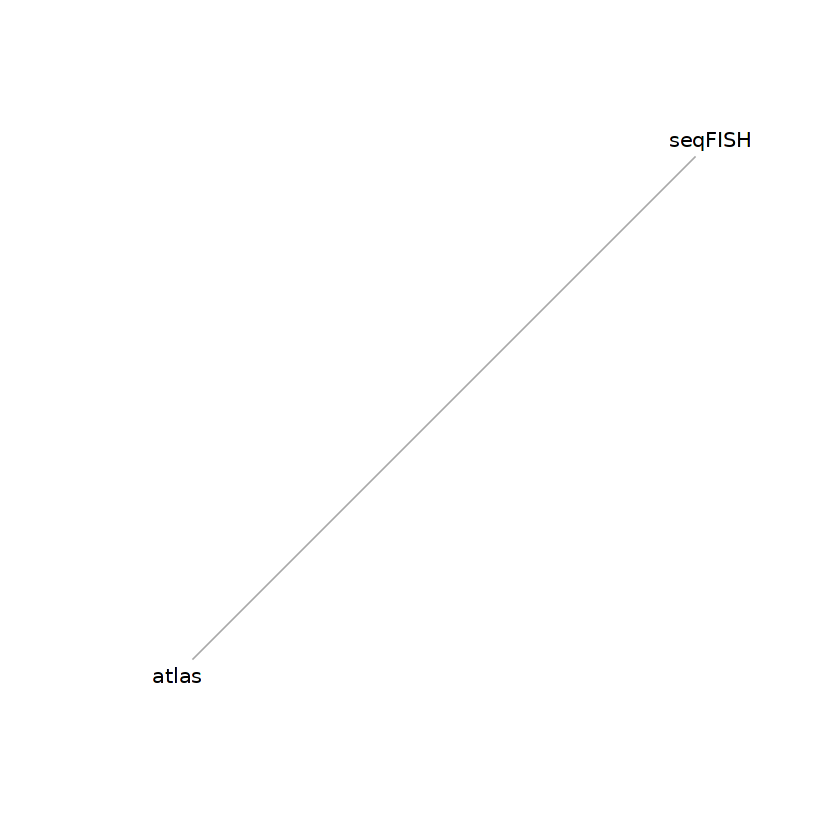

In [30]:
## Run STABMAP
StabMAP = stabMap(
  assay_list = list(
    atlas = reference_logcounts,
    seqFISH = query_logcounts_1
  ),
  reference_scores_list = list(
    "atlas" = reference_PC[,1:n],
    "seqFISH" = query_PC_1[,1:n]
  ),
  ncomponentsReference = list(
    "atlas" = ncol(reference_PC[,1:n]),
    "seqFISH" = ncol(query_PC_1[,1:n])
  ),
  projectAll = TRUE, 
)

# reweight embedding for equal contribution
StabMAP_reweighted = reWeightEmbedding(StabMAP)

In [31]:
# Run Reduced MNN to Remove Batch Effects
# First set the batches for some horizontal data integration for batch effects
batchfactor = setNames(rep(NA, nrow(StabMAP_reweighted)),
                           rownames(StabMAP_reweighted))

batchfactor[colnames(query_logcounts_1)] <- "seqFISH"
batchfactor[colnames(reference_logcounts)] <- "atlas"

# Now run reducedMNN on the StabMAP Output
StabMAP_reweighted_MNNcorrected <- reducedMNN_batchFactor(StabMAP_reweighted,
                                           batch = batchfactor,
                                           k = 10)

# Now run Harmony and make sure that harmony doesnt stop early
#StabMAP_reweighted_Harmonycorrected = Harmony_batchFactor(
# StabMAP_reweighted,
# batchFactor = batchfactor,
# epsilon.cluster = -Inf,
# epsilon.harmony = -Inf
#)

StabMAP_reweighted_MNNcorrected_original_counts <- StabMAP_reweighted_MNNcorrected
#StabMAP_reweighted_Harmonycorrected_original_counts <- StabMAP_reweighted_Harmonycorrected

## Run Stab Map + ReducedMNN and HARMONY on the Integrated RNA LogCounts

In [32]:
## Set Variables for StabMAP ##

#counts matrices
query_logcounts_1 <- seqFISH_integrated_logcounts
reference_logcounts <- atlas_integrated_logcounts

#PCs
query_PC_1 <- seqFISH_pca
reference_PC <- atlas_pca

# number of PCs to use
n <- 30

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 5.3 GiB”
treating "atlas" as reference

reference scores given, using these for mosaic integration

generating embedding for path with reference "atlas": "atlas"

generating embedding for path with reference "atlas": "seqFISH" -> "atlas"

treating "seqFISH" as reference

reference scores given, using these for mosaic integration

generating embedding for path with reference "seqFISH": "seqFISH"

generating embedding for path with reference "seqFISH": "atlas" -> "seqFISH"

reweighting for references:  atlas_PC seqFISH_PC 



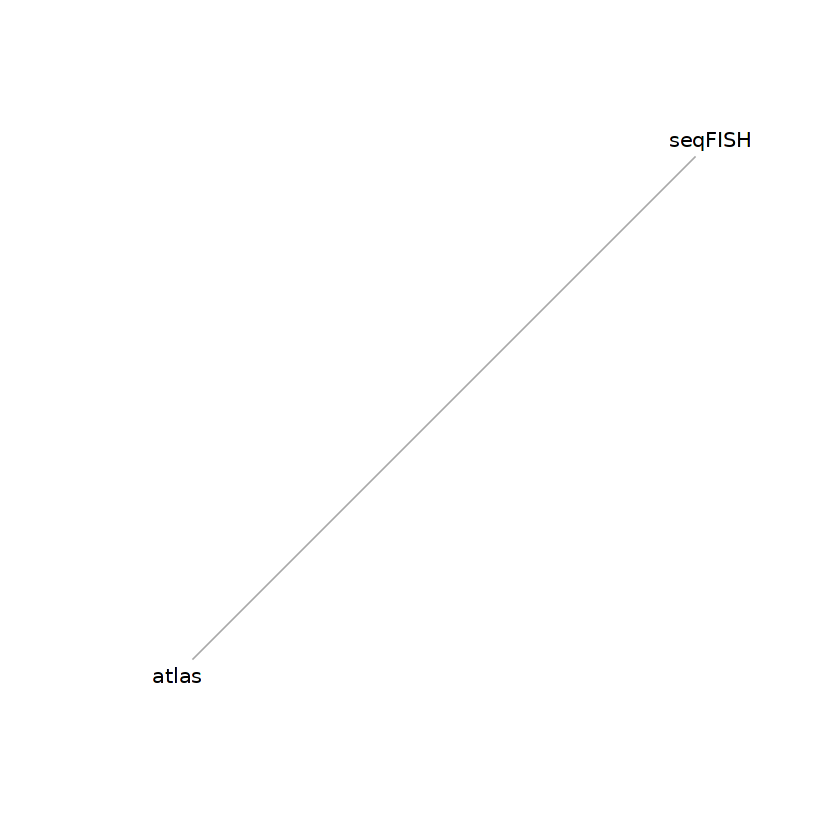

In [33]:
## Run STABMAP
StabMAP = stabMap(
  assay_list = list(
    atlas = reference_logcounts,
    seqFISH = query_logcounts_1
  ),
  reference_scores_list = list(
    "atlas" = reference_PC[,1:n],
    "seqFISH" = query_PC_1[,1:n]
  ),
  ncomponentsReference = list(
    "atlas" = ncol(reference_PC[,1:n]),
    "seqFISH" = ncol(query_PC_1[,1:n])
  ),
  projectAll = TRUE, 
)

# reweight embedding for equal contribution
StabMAP_reweighted = reWeightEmbedding(StabMAP)

In [34]:
# Run Reduced MNN to Remove Batch Effects
# First set the batches for some horizontal data integration for batch effects
batchfactor = setNames(rep(NA, nrow(StabMAP_reweighted)),
                           rownames(StabMAP_reweighted))

batchfactor[colnames(query_logcounts_1)] <- "seqFISH"
batchfactor[colnames(reference_logcounts)] <- "atlas"

# Now run reducedMNN on the StabMAP Output
StabMAP_reweighted_MNNcorrected <- reducedMNN_batchFactor(StabMAP_reweighted,
                                           batch = batchfactor,
                                           k = 10)

# Now run Harmony and make sure that harmony doesnt stop early
#StabMAP_reweighted_Harmonycorrected = Harmony_batchFactor(
# StabMAP_reweighted,
# batchFactor = batchfactor,
# epsilon.cluster = -Inf,
# epsilon.harmony = -Inf
#)

StabMAP_reweighted_MNNcorrected_integrated_counts <- StabMAP_reweighted_MNNcorrected
#StabMAP_reweighted_Harmonycorrected_original_counts <- StabMAP_reweighted_Harmonycorrected

## Save the StabMAP Outputs

In [36]:
saveRDS(StabMAP_reweighted_MNNcorrected_original_counts, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_original_counts_without_neigh.Rds")
saveRDS(StabMAP_reweighted_MNNcorrected_integrated_counts, "projects/03_seqFISH_FINAL/code/stab_map_all_together_post_QC/output/StabMAP_allstages_postQC_reweighted_MNNcorrected_integrated_counts_without_neigh.Rds")


#saveRDS(StabMAP_reweighted_MNNcorrected_integrated_counts, "03_seqFISH_FINAL/code/seqFISH_integration/processed/StabMAP_reweighted_MNNcorrected_integrated_counts_with_neigh.Rds")
#saveRDS(StabMAP_reweighted_Harmonycorrected_integrated_counts, "03_seqFISH_FINAL/code/seqFISH_integration/processed/StabMAP_reweighted_Harmonycorrected_integrated_counts_with_neigh.Rds")